#### Download small data from Dropbox

In [1]:
!wget https://www.dropbox.com/s/7zboazpcn5571s7/pop_mapping.txt
!wget https://www.dropbox.com/s/ox1f9nslch6hiag/pops_with_ints_pandas.pkl
!wget https://www.dropbox.com/s/g3j68q988kj75x8/super_pop_int_numpy.pkl

--2018-04-23 00:18:38--  https://www.dropbox.com/s/7zboazpcn5571s7/pop_mapping.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/ZHxV1aI8tAJVoQ3Dncr4yTLtWM18hRgn4FDBF641Mmf8MQ8hnS4TQarNo6ZYORoR/file [following]
--2018-04-23 00:18:38--  https://dl.dropboxusercontent.com/content_link/ZHxV1aI8tAJVoQ3Dncr4yTLtWM18hRgn4FDBF641Mmf8MQ8hnS4TQarNo6ZYORoR/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.66.6, 2620:100:601f:6::a27d:906
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.66.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282 (1.3K) [text/plain]
Saving to: ‘pop_mapping.txt’

pop_mapping.txt     100%[===================>]   1.25K  --.-KB/s    in 0s      

2018-04-23 00:18:39 (1

In [2]:
!ls

datalab  pop_mapping.txt  pops_with_ints_pandas.pkl  super_pop_int_numpy.pkl


#### Download big data from Drive

In [0]:
!pip install gdown

    100% |████████████████████████████████| 51kB 1.8MB/s 
  Running setup.py bdist_wheel for gdown ... - done
  Stored in directory: /content/.cache/pip/wheels/86/ba/02/4f495665115fe7f8ec60145074c48f433b5890186982e8cbb9
Successfully built gdown
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
!gdown --id 1vW5JjidT-7bUiG2P7uscBGRpcQapSIEY

Downloading...
From: https://drive.google.com/uc?id=1vW5JjidT-7bUiG2P7uscBGRpcQapSIEY
To: /content/data_all_copy.pkl
2.18GB [00:30, 72.1MB/s]


In [0]:
!ls

data_all_copy.pkl  datalab


#### Import Libraries and PyTorch

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
import os, sys, time, datetime
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import sklearn
import pickle

#### PCA

In [0]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, IncrementalPCA

In [0]:
# Load labels
spop_ints = pickle.load(open('super_pop_int_numpy.pkl','rb'))
print(len(spop_ints), spop_ints) # y

3450 [3 3 3 ... 4 4 4]


In [0]:
# Load values, chack standardiza, and truncate
data_all = data_all[:, :4021] 
data_all = scale(data_all) 
data_all.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(3450, 4021)

In [0]:
# Create PCA
ipca = IncrementalPCA(n_components=2, batch_size=10)

In [0]:
# Fit PCA
ipca.fit(data_all)

IncrementalPCA(batch_size=10, copy=True, n_components=2, whiten=False)

In [0]:
# Fit to data
data_new = ipca.transform(data_all)

In [0]:
# Explore
print('data_all shape: ', data_all.shape)
print('data_new shape: ', data_new.shape)

data_all shape:  (3450, 4021)
data_new shape:  (3450, 2)


In [0]:
# Plotting: label to color dictionary
labels = spop_ints
label_color_dict = {0:'yellow',1:'red',2:'green',3:'blue', 4: 'purple'}
cvec = [label_color_dict[label] for label in labels]

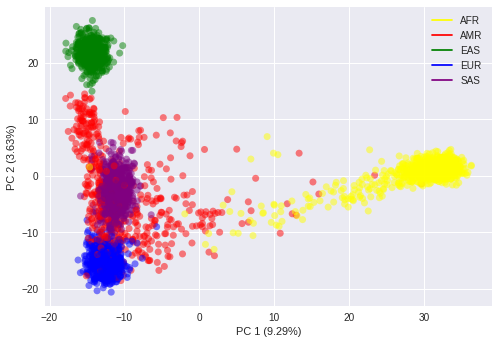

In [0]:
from matplotlib.patches import Circle
# Create the scatter plot
pca_feats = data_new
plt.scatter(pca_feats[:,0], pca_feats[:,1], c=cvec, edgecolor='', alpha=0.5)

# Add the labels
map_super_to_int = {'AFR': 0, 'AMR': 1, 'EAS': 2, 'EUR': 3, 'SAS': 4}
for s in map_super_to_int:

    # Get the index of the name
    i = map_super_to_int[s]

    # Mark the labeled observations with a star marker
    ax.scatter(pca_feats[i,0], pca_feats[i,1], 
               c=cvec[i], # vmin=min(cvec), vmax=max(cvec), 
               edgecolors='none', alpha=0.3, s=100, label=s)


# Add the axis labels and legend
plt.xlabel('PC 1 (%.2f%%)' % (ipca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (ipca.explained_variance_ratio_[1]*100)) 

# Add legend elements
legend_elements = [Line2D([0], [0], color=label_color_dict[map_super_to_int[s]], label=s) for s in map_super_to_int]
    
# Create the figure
# fig, ax = plt.subplots()
plt.legend(handles=legend_elements)

plt.show()

#### PCA from download

In [4]:
# Download post-PCA data
!wget https://www.dropbox.com/s/q755qzv95g7pn1q/data_pca.pkl
!wget https://www.dropbox.com/s/g3j68q988kj75x8/super_pop_int_numpy.pkl

--2018-04-23 04:56:14--  https://www.dropbox.com/s/q755qzv95g7pn1q/data_pca.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/PsT5cQeYZt6R7pQeRlvUP7tMg9oXWjoeQAogO29Rh8Oq70x2imLmkXmoSsVqAtte/file [following]
--2018-04-23 04:56:15--  https://dl.dropboxusercontent.com/content_link/PsT5cQeYZt6R7pQeRlvUP7tMg9oXWjoeQAogO29Rh8Oq70x2imLmkXmoSsVqAtte/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.81.6, 2620:100:601f:6::a27d:906
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.81.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55361 (54K) [application/octet-stream]
Saving to: ‘data_pca.pkl.1’

data_pca.pkl.1      100%[===================>]  54.06K   221KB/s    in 0.2s    

2018-04-23 

In [6]:
# Load data
import pickle
data_new = pickle.load(open('data_pca.pkl','rb'))
print('Data shape: ', data_new.shape)

# Load labels
spop_ints = pickle.load(open('super_pop_int_numpy.pkl','rb'))
print('Labels shape: ', len(spop_ints), spop_ints) # y

Data shape:  (3450, 2)
Labels shape:  3450 [3 3 3 ... 4 4 4]


In [0]:
# Plotting: label to color dictionary
labels = spop_ints
label_color_dict = {0:'yellow',1:'red',2:'green',3:'blue', 4: 'purple'}
cvec = [label_color_dict[label] for label in labels]

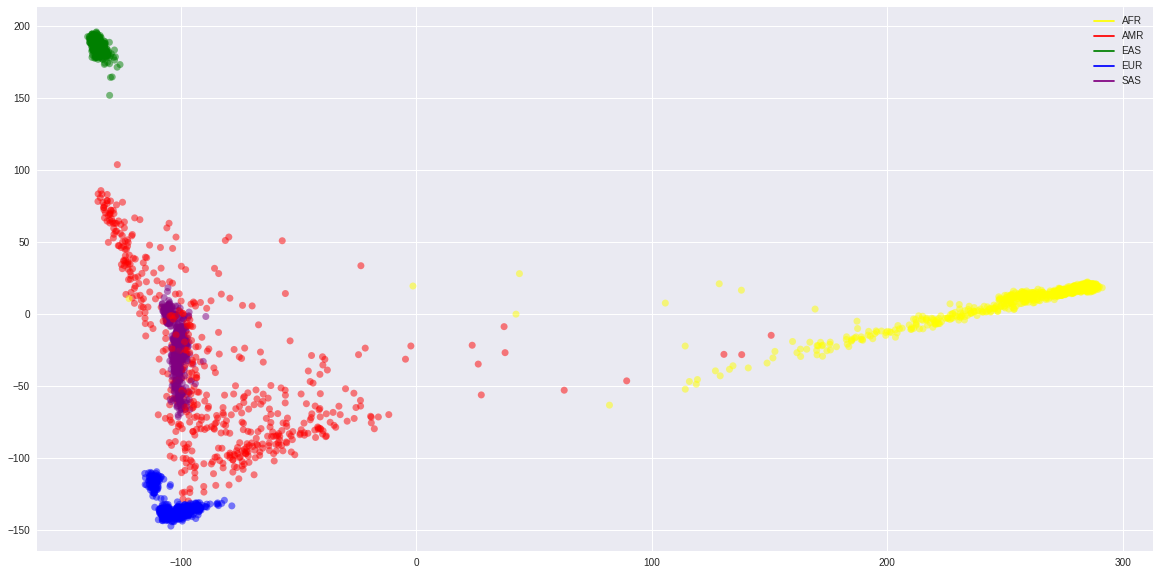

In [18]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.figure(figsize=(20,10))

# Create the scatter plot
pca_feats = data_new
plt.scatter(pca_feats[:,0], pca_feats[:,1], c=cvec, edgecolor='', alpha=0.5)

# Add the labels
map_super_to_int = {'AFR': 0, 'AMR': 1, 'EAS': 2, 'EUR': 3, 'SAS': 4}
for s in map_super_to_int:

    # Get the index of the name
    i = map_super_to_int[s]

    # Mark the labeled observations with a star marker
    plt.scatter(pca_feats[i,0], pca_feats[i,1], 
               c=cvec[i], # vmin=min(cvec), vmax=max(cvec), 
               edgecolors='none', alpha=0.3, s=100, label=s)


# Add legend elements
legend_elements = [Line2D([0], [0], color=label_color_dict[map_super_to_int[s]], label=s) for s in map_super_to_int]
    
# Create the figure
# fig, ax = plt.subplots()
plt.legend(handles=legend_elements)

plt.show()